In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### Prendendo come riferimento il modello LSTM

In [2]:
df = pd.read_csv('LSTM/cohen_kappa.csv', header=[0], index_col=[0], skiprows=[1])
print('Evidenziando i valori massimi...')
display(df.style.highlight_max(axis=1, color='lightgreen').format('{:.2f}'))
print('Stampandolo come dataframe...')
lstm_max_df = df.max(axis=1).to_frame('Cohen kappa').T
lstm_max_df

Evidenziando i valori massimi...


,au_intensities,au_activations,au_intensities_activations
anger,0.08,0.03,0.03
disgust,0.08,0.02,0.00
fear,0.04,0.01,0.06
happiness,0.33,0.26,0.35
sadness,0.04,-0.06,0.15
surprise,0.10,0.11,0.02
valence,0.18,0.16,0.20


Stampandolo come dataframe...


,anger,disgust,fear,happiness,sadness,surprise,valence
Cohen kappa,0.08,0.08,0.06,0.35,0.15,0.11,0.2


#### Confronto con il Dummy classifier

,anger,disgust,fear,happiness,sadness,surprise,valence
LSTM,0.08,0.08,0.06,0.35,0.15,0.11,0.20
Dummy classifier,0.08,-0.00,0.05,0.06,0.05,0.10,0.07


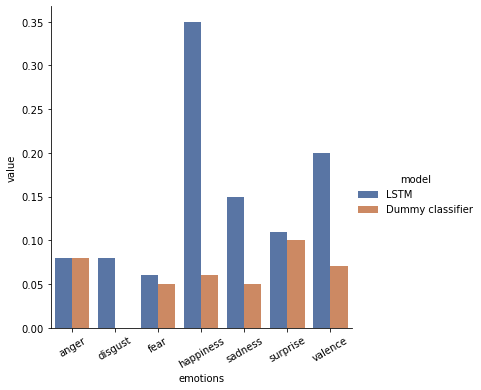

In [3]:
dummy_df = pd.read_csv('dummy_classifier/cohen_kappa.csv', header=[0,1], index_col=[0])
dummy_df = dummy_df.loc[:,(['delaunay','au_intensities','au_activations','au_intensities_activations'], ['none'])]  # select the pose=none columns
cohen_kappa_df = lstm_max_df.append(dummy_df.max(axis=1).to_frame('Dummy classifier').T).rename(index={'Cohen kappa': 'LSTM'})
display(cohen_kappa_df.style.highlight_max(color='lightgreen').format('{:.2f}'))

df = cohen_kappa_df.reset_index().melt(id_vars='index', var_name='emotions').rename(columns={'index':'model'})
fg = sns.catplot(data=df, x='emotions', y='value', hue='model', kind='bar', palette='deep')
fg.set_xticklabels(rotation=30)
plt.show()

Confronto con i valori del paper

,anger,disgust,fear,happiness,sadness,surprise,valence
LSTM,0.08,0.08,0.06,0.35,0.15,0.11,0.20
xgboost,0.12,0.08,0.02,0.34,0.06,0.17,0.21


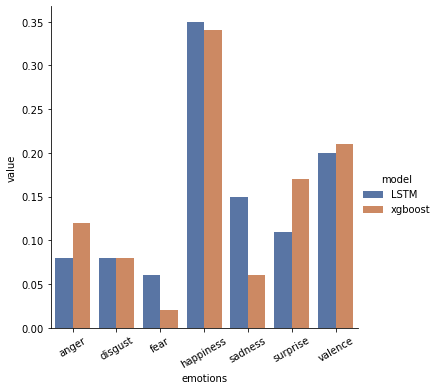

In [4]:
columns = ['anger','disgust','fear','happiness','sadness','surprise','valence']
data = np.array([[0.12, 0.08, 0.02, 0.34, 0.06, 0.17, 0.21]])
paper_results = pd.DataFrame(data=data, columns=columns, index=['xgboost'])
final_df = pd.concat([lstm_max_df.rename(index={'Cohen kappa': 'LSTM'}), paper_results])
display(final_df.style.highlight_max(color='lightgreen').format('{:.2f}'))

final_df = final_df.reset_index().rename(columns={'index': 'model'}).melt(id_vars='model', var_name='emotions')
fg = sns.catplot(data=final_df, x='emotions', y='value', hue='model', kind='bar', palette='deep')
fg.set_xticklabels(rotation=30)
plt.show()

#### Massimo cohen kappa tra tutti modelli e tutte le features (considerando  _pose_ = none)

In [5]:
logistic_df = pd.read_csv('logistic_regression/cohen_kappa.csv', header=[0,1], index_col=[0])
linear_df = pd.read_csv('linear_SVM/cohen_kappa.csv', header=[0,1], index_col=[0])
kernel_df = pd.read_csv('kernel_SVM/cohen_kappa.csv', header=[0,1], index_col=[0])
lstm_df = pd.read_csv('LSTM/cohen_kappa.csv', header=[0], index_col=[0], skiprows=[1])

df_list = [logistic_df, linear_df, kernel_df]
for i,df in enumerate(df_list):
    
    df_list[i] = df.loc[:,(['delaunay','au_intensities','au_activations','au_intensities_activations'], ['none'])]
    
df_list.append(lstm_df)
max_df = pd.concat(df_list, axis=1).max(axis=1).to_frame('max values').T
max_df

,anger,disgust,fear,happiness,sadness,surprise,valence
max values,0.14,0.15,0.06,0.35,0.15,0.22,0.27


# Medioni

## Confronto con il dummy classifier

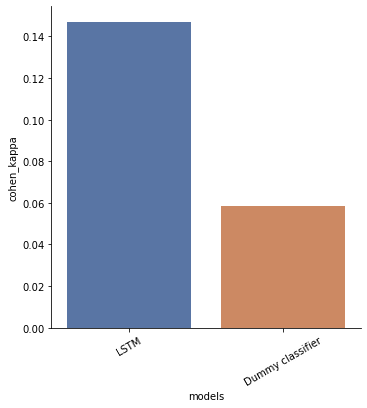

In [36]:
dummy_df = pd.read_csv('dummy_classifier/cohen_kappa.csv', header=[0,1], index_col=[0])
dummy_df = dummy_df.loc[:,(['delaunay','au_intensities','au_activations','au_intensities_activations'], ['none'])]  # select the pose=none columns
cohen_kappa_df = lstm_max_df.append(dummy_df.max(axis=1).to_frame('Dummy classifier').T).rename(index={'Cohen kappa': 'LSTM'})

df = cohen_kappa_df.mean(axis=1).reset_index().rename(columns={'index':'models', 0:'cohen_kappa'})
fg = sns.catplot(data=df, x='models', y='cohen_kappa', kind='bar', palette='deep')
fg.set_xticklabels(rotation=30)

plt.show()

## Confronto con il paper

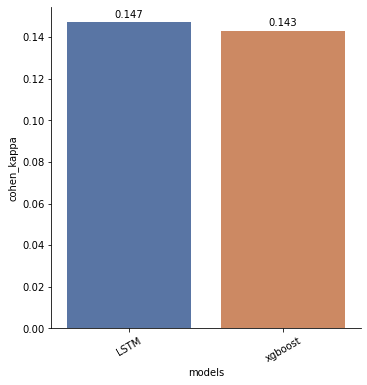

In [33]:
#### columns = ['anger','disgust','fear','happiness','sadness','surprise','valence']
data = np.array([[0.12, 0.08, 0.02, 0.34, 0.06, 0.17, 0.21]])
paper_results = pd.DataFrame(data=data, columns=columns, index=['xgboost'])
final_df = pd.concat([lstm_max_df.rename(index={'Cohen kappa': 'LSTM'}), paper_results])

final_df = final_df.mean(axis=1).reset_index().rename(columns={'index':'models', 0:'cohen_kappa'})
fg = sns.catplot(data=final_df, x='models', y='cohen_kappa', kind='bar', palette='deep')
fg.set_xticklabels(rotation=30)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(final_df.cohen_kappa, 3).values[i] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3)

plt.show()